In [5]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.neighbors import DistanceMetric
from sklearn.metrics.pairwise import pairwise_distances
from sklearn import cluster
from sklearn.decomposition.pca import PCA
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn import preprocessing
from definitions import *

In [6]:
def angsep(ra1,dec1,ra2,dec2):
    SEP = numpy.cos(dec1*numpy.pi/180)*numpy.cos(dec2*numpy.pi/180)*numpy.cos((ra1-ra2)*numpy.pi/180)
    SEP += numpy.sin(dec1*numpy.pi/180)*numpy.sin(dec2*numpy.pi/180) #returns values between 0 and pi radians
    SEP = numpy.arccos(SEP)
    return SEP*180./numpy.pi

In [7]:
pd_common_gevtevxmm = pd.read_csv("markeddata/gevtevsimbadxmm_005_normalized.txt", sep='\t')
pd_common_gevtevxmm_noLog = pd.read_csv("markeddata/gevtevsimbadxmm_005_normalizedWITHOUT_LOG.txt", sep='\t')

In [8]:
pd_common_gevtevxmm_noLog[pd_common_gevtevxmm_noLog['marked']== 1]

,xmm_SC_EP_1_FLUX,xmm_SC_EP_2_FLUX,xmm_SC_EP_3_FLUX,xmm_SC_EP_4_FLUX,xmm_SC_EP_5_FLUX,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,...,gev_GLAT,gev_RAJ2000,gev_DEJ2000,tev_fermi_names,tev_classes,tev_glat,tev_glon,tev_pos_dec,tev_pos_ra,marked
180,0.000000e+00,0.000003,0.000006,0.000005,0.000000,0.014499,0.216195,0.331072,0.099186,0.322289,...,1.086277,40.137901,61.228100,b'',b'bin',1.086135,135.675278,61.229336,40.131950,1
462,3.413678e-07,0.000038,0.000034,0.000024,0.000005,0.006511,0.225761,0.309679,0.088951,0.355697,...,-1.690106,154.729904,-58.945599,b'1FGL J1018.6-5856',b'bin',-1.779517,284.314087,-59.000001,154.575002,1
1349,0.000000e+00,0.000002,0.000005,0.000037,0.000131,0.007596,0.117044,0.309295,0.034499,0.203505,...,-1.293795,276.568390,-14.847300,b'',b'bin',-1.289216,16.881586,-14.848400,276.562744,1
1527,1.817447e-06,0.000004,0.000039,0.000135,0.000219,0.018194,0.188459,0.378546,0.078329,0.293264,...,1.185560,303.908295,37.160599,b'',"b'pwn,snr'",1.150181,74.953850,37.214764,304.007606,1


In [9]:
pd_common_gevtevxmm[pd_common_gevtevxmm['marked'] != 0]

,xmm_SC_EP_1_FLUX,xmm_SC_EP_2_FLUX,xmm_SC_EP_3_FLUX,xmm_SC_EP_4_FLUX,xmm_SC_EP_5_FLUX,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,...,gev_GLAT,gev_RAJ2000,gev_DEJ2000,tev_fermi_names,tev_classes,tev_glat,tev_glon,tev_pos_dec,tev_pos_ra,marked
180,0.000000,0.000003,0.000006,0.000004,0.000000,0.014499,0.216195,0.331073,0.099186,0.322289,...,1.086277,40.137901,61.228100,b'',b'bin',1.086135,135.675278,61.229336,40.131950,1
462,0.000000,0.000039,0.000034,0.000024,0.000005,0.006511,0.225761,0.309679,0.088951,0.355697,...,-1.690106,154.729904,-58.945599,b'1FGL J1018.6-5856',b'bin',-1.779517,284.314087,-59.000001,154.575002,1
1349,0.000000,0.000002,0.000004,0.000037,0.000131,0.007596,0.117044,0.309295,0.034499,0.203504,...,-1.293795,276.568390,-14.847300,b'',b'bin',-1.289216,16.881586,-14.848400,276.562744,1
1527,0.000002,0.000002,0.000039,0.000136,0.000218,0.018193,0.188459,0.378547,0.078329,0.293264,...,1.185560,303.908295,37.160599,b'',"b'pwn,snr'",1.150181,74.953850,37.214764,304.007606,1


In [10]:
pd_common_gevtevxmm

,xmm_SC_EP_1_FLUX,xmm_SC_EP_2_FLUX,xmm_SC_EP_3_FLUX,xmm_SC_EP_4_FLUX,xmm_SC_EP_5_FLUX,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,...,gev_GLAT,gev_RAJ2000,gev_DEJ2000,tev_fermi_names,tev_classes,tev_glat,tev_glon,tev_pos_dec,tev_pos_ra,marked
0,0.000148,0.001157,0.008680,0.005386,0.000030,0.068056,0.072047,0.003353,0.037730,0.143368,...,1.337755,6.432600,64.069298,b'',b'snr',1.412930,120.092361,64.140802,6.339723,0
1,0.000015,0.001612,0.010148,0.006538,0.000000,0.067855,0.071834,0.003343,0.037618,0.142944,...,1.337755,6.432600,64.069298,b'',b'snr',1.412930,120.092361,64.140802,6.339723,0
2,0.000045,0.002267,0.001156,0.000060,0.000000,0.068877,0.072916,0.003394,0.038185,0.145097,...,1.337755,6.432600,64.069298,b'',b'snr',1.412930,120.092361,64.140802,6.339723,0
3,0.000089,0.003337,0.005780,0.002130,0.000000,0.068337,0.072345,0.003367,0.037886,0.143960,...,1.337755,6.432600,64.069298,b'',b'snr',1.412930,120.092361,64.140802,6.339723,0
4,0.000826,0.014956,0.043243,0.026937,0.000124,0.063171,0.066875,0.003112,0.035021,0.133075,...,1.337755,6.432600,64.069298,b'',b'snr',1.412930,120.092361,64.140802,6.339723,0
5,0.000134,0.002965,0.006451,0.001341,0.000462,0.068336,0.072344,0.003367,0.037885,0.143957,...,1.337755,6.432600,64.069298,b'',b'snr',1.412930,120.092361,64.140802,6.339723,0
6,0.000045,0.001403,0.005911,0.002000,0.000060,0.068470,0.072485,0.003373,0.037959,0.144239,...,1.337755,6.432600,64.069298,b'',b'snr',1.412930,120.092361,64.140802,6.339723,0
7,0.001824,0.029883,0.058675,0.026196,0.000080,0.061057,0.064638,0.003008,0.033850,0.128624,...,1.337755,6.432600,64.069298,b'',b'snr',1.412930,120.092361,64.140802,6.339723,0
8,0.000089,0.002531,0.005584,0.003589,0.000000,0.068306,0.072311,0.003365,0.037868,0.143893,...,1.337755,6.432600,64.069298,b'',b'snr',1.412930,120.092361,64.140802,6.339723,0
9,0.000149,0.002597,0.004448,0.002209,0.000000,0.068471,0.072486,0.003374,0.037960,0.144241,...,1.337755,6.432600,64.069298,b'',b'snr',1.412930,120.092361,64.140802,6.339723,0


In [11]:
pd_common_gevtevxmm = pd_common_gevtevxmm.loc[:, ~pd_common_gevtevxmm.columns.str.contains('^Unnamed')]

In [12]:
spectra_columns = list_xmm_spectra_columns() + list_gev_spectrum_columns() + list_tev_spectrum_columns()
other_columns = list_xmm_other_columns() + list_gev_other_columns() + list_tev_other_columns()

In [13]:
def show_marked_spectra(spectra_columns, spectra):
    plt.clf()
    fig, ax = plt.subplots(figsize=(16,6))
    marked_spectra = spectra[spectra['marked'] == 1]
    
    for i in range(0,len(marked_spectra)):
        table = marked_spectra[spectra_columns].iloc[i]
        values = table.values

        spectra_points_number = len(spectra_columns)
        plt.xticks(())
        #if i == 0:
        #    plt.setp([plt], title='Normalized columns')
        if i == 3:
            #plt.set_xlabel('optics - gev - tev')
            plt.xticks(range(spectra_points_number), spectra_columns,rotation=45)
        ax.plot(range(len(values)), marked_spectra[spectra_columns].iloc[i].values, label=marked_spectra['gev_1FGL_Name'].values[i])
        legend = ax.legend(loc = 'upper right')   
    plt.show()

In [14]:
(pd_common_gevtevxmm[pd_common_gevtevxmm['marked'] == 1])[['gev_1FGL_Name', 's_MAIN_ID', 's_class', 'tev_glat', 'tev_glon']]

,gev_1FGL_Name,s_MAIN_ID,s_class,tev_glat,tev_glon
180,b'1FGL J0240.5+6113 ',"[""b'BD+60 529'"" ""b'EM* MWC 56'"" ""b'LS I ...",['B' 'B' 'B0Ve' 'B0Ve'],1.086135,135.675278
462,b'1FGL J1018.6-5856 ',"[""b'2FGL J1019.0-5856'""]",['B0Ve'],-1.779517,284.314087
1349,b'1FGL J1826.2-1450 ',"[""b'LS IV -14 55'"" ""b'BD-14 5047'"" ""b'V* V...",['B' 'B0Ve' 'B0Ve'],-1.289216,16.881586
1527,b'1FGL J2015.7+3708 ',"[""b'Hen 2-461'"" ""b'Hen 2-461'""]",['Be' 'B'],1.150181,74.953850


<Figure size 432x288 with 0 Axes>

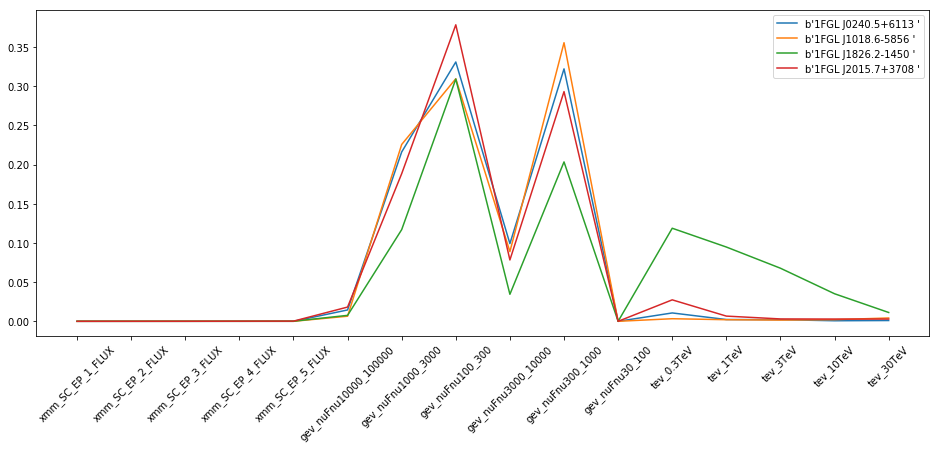

In [15]:
show_marked_spectra(spectra_columns, pd_common_gevtevxmm)

<Figure size 432x288 with 0 Axes>

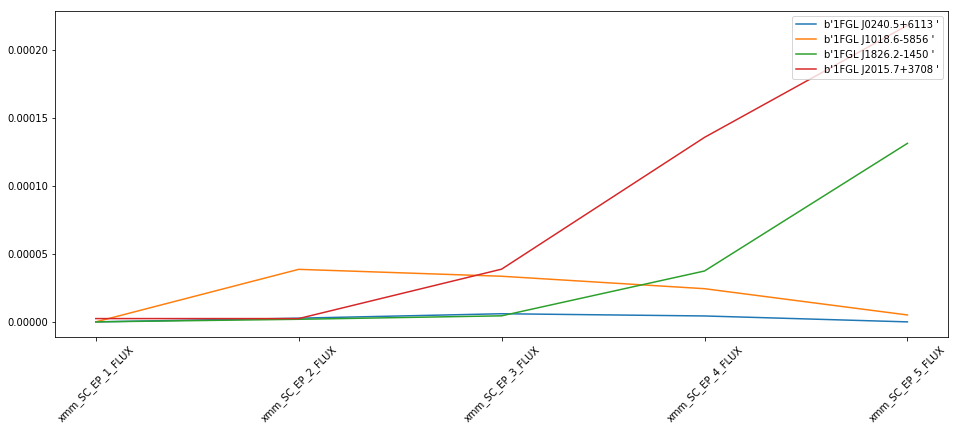

In [16]:
show_marked_spectra(list_xmm_spectra_columns(), pd_common_gevtevxmm)

<Figure size 432x288 with 0 Axes>

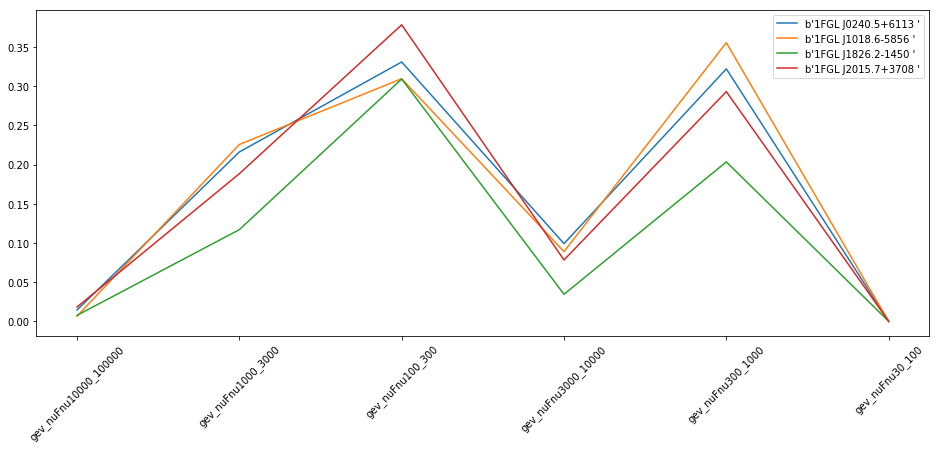

In [17]:
show_marked_spectra(list_gev_spectrum_columns(), pd_common_gevtevxmm)

<Figure size 432x288 with 0 Axes>

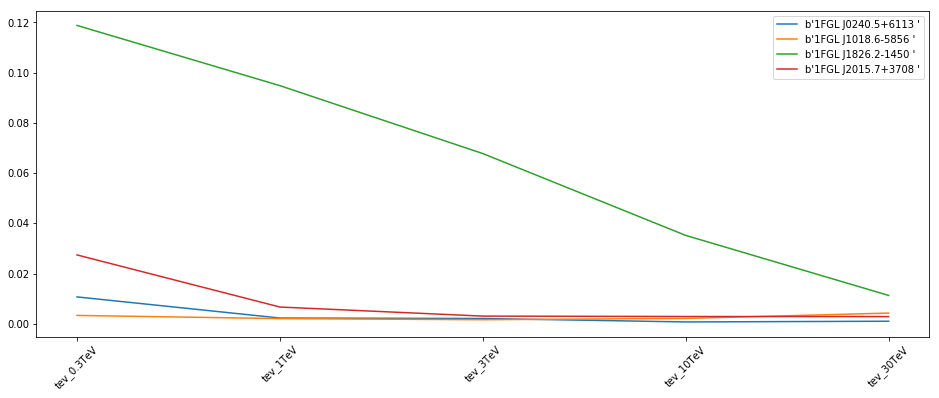

In [18]:
show_marked_spectra(list_tev_spectrum_columns(), pd_common_gevtevxmm)

<Figure size 432x288 with 0 Axes>

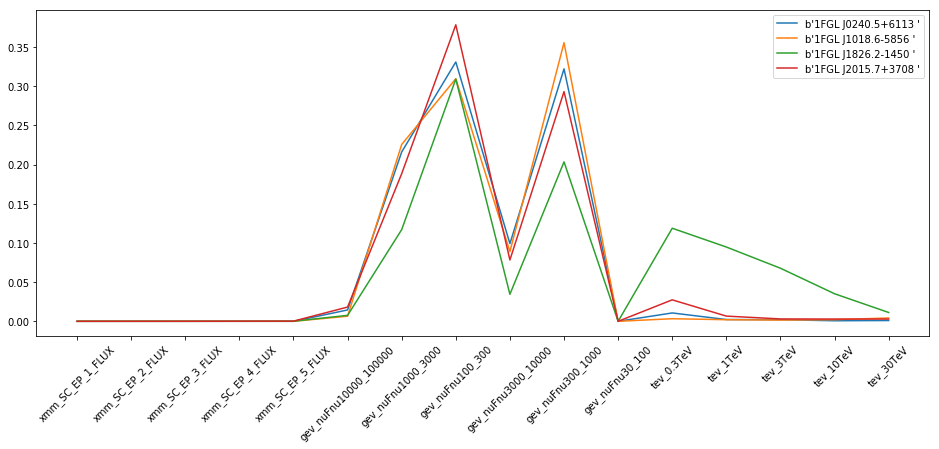

In [19]:
show_marked_spectra(spectra_columns, pd_common_gevtevxmm_noLog)